In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter(action='ignore')

In [2]:
main = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv', sep = ';', parse_dates=True, index_col=0)
main.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [ ]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 546.9+ KB


In [ ]:
main.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


In [3]:
df = main.copy()

## Cleaning

1. Change 'CCAvg' column to float

In [4]:
# replace ',' with '.' in CCAvg
df['CCAvg'] = df['CCAvg'].apply(lambda x: x.replace(',', '.'))

In [5]:
# change Total_income type to float
df['CCAvg'] = df['CCAvg'].astype(float)

2. Clean 'Experience' with negative values 

Either delete rows with negative values or impute data

In [ ]:
# number of obs with neg experience
len(df[df['Experience'] < 0])

52

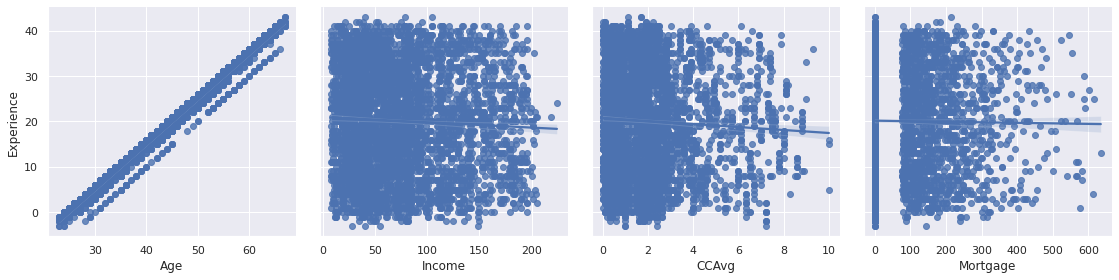

In [ ]:
# check which variables correlate with experience
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

In [6]:
# get list of unique age values with negative experience
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [7]:
# get indexes of negative values in 'Experience'

indexes = df[df['Experience'] < 0].index.tolist()

In [8]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

3. Rename columns

In [9]:
df.rename(columns = {'Personal Loan':'Loan', 'Securities Account':'Security', 'CD Account':'CD'}, inplace = True)

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Loan', 'Security', 'CD', 'Online',
       'CreditCard'],
      dtype='object')

In [10]:
df.drop('ZIP Code', axis=1, inplace=True)

4. Create dummy variables

In [ ]:
#create categorical variables and drop some variables
#data=pd.get_dummies(df, columns=["Family","Education","Security", "CD", "Online", "CreditCard"])

In [11]:
data = df

In [ ]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Loan', 'Security', 'CD', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# data.drop('Security_0', axis=1, inplace=True)
# data.drop('CD_0', axis=1, inplace=True)
# data.drop('Online_0', axis=1, inplace=True)
# data.drop('CreditCard_0', axis=1, inplace=True)
# data.drop('ZIP Code', axis=1, inplace=True)

## Visualisation

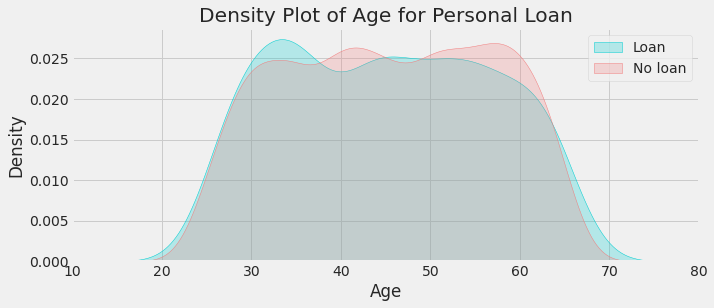

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data["Age"][data.Loan == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Age"][data.Loan == 0], color="lightcoral", shade=True)
plt.legend(['Loan', 'No loan'])
plt.title('Density Plot of Age for Personal Loan')
ax.set(xlabel='Age')
plt.xlim(10,80)
plt.show()

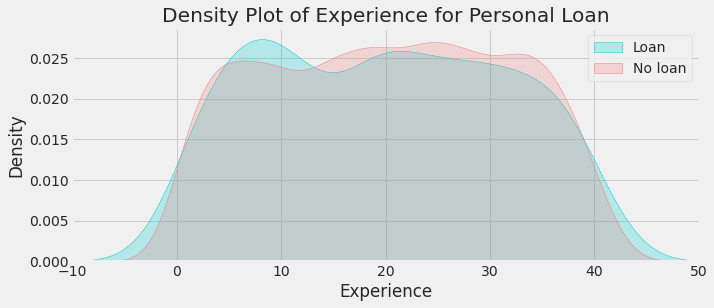

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data["Experience"][data.Loan == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Experience"][data.Loan == 0], color="lightcoral", shade=True)
plt.legend(['Loan', 'No loan'])
plt.title('Density Plot of Experience for Personal Loan')
ax.set(xlabel='Experience')
plt.xlim(-10,50)
plt.show()

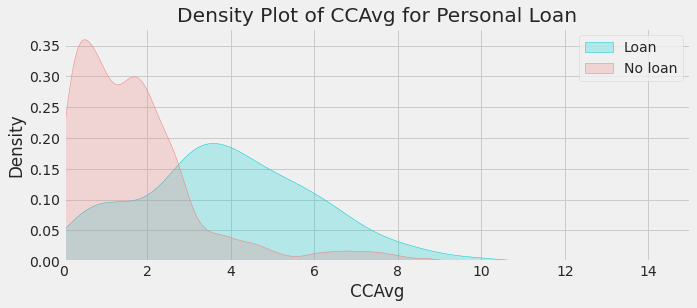

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data["CCAvg"][data.Loan == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["CCAvg"][data.Loan == 0], color="lightcoral", shade=True)
plt.legend(['Loan', 'No loan'])
plt.title('Density Plot of CCAvg for Personal Loan')
ax.set(xlabel='CCAvg')
plt.xlim(0,15)
plt.show()

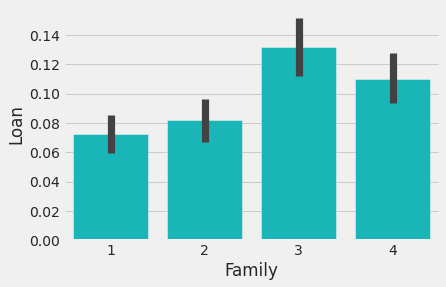

In [ ]:
sns.barplot('Family', 'Loan', data=df, color="darkturquoise")
plt.show()

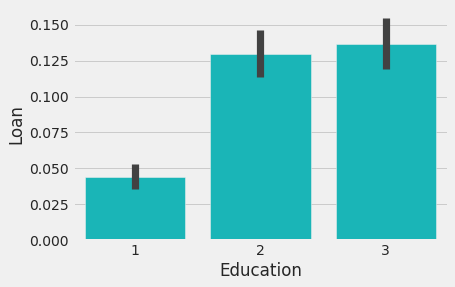

In [ ]:
sns.barplot('Education', 'Loan', data=df, color="darkturquoise")
plt.show()

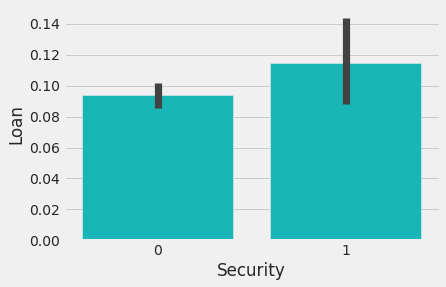

In [ ]:
sns.barplot('Security', 'Loan', data=df, color="darkturquoise")
plt.show()

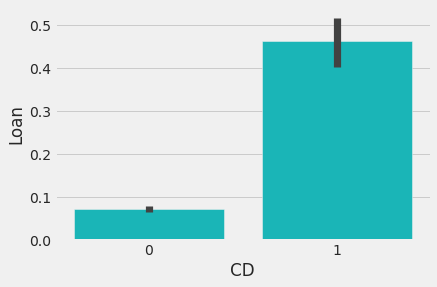

In [ ]:
sns.barplot('CD', 'Loan', data=df, color="darkturquoise")
plt.show()

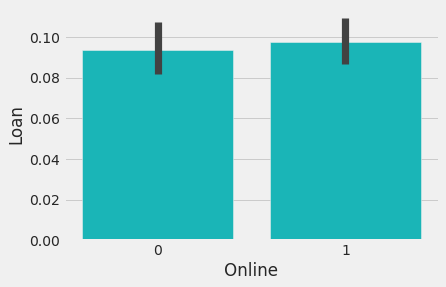

In [ ]:
sns.barplot('Online', 'Loan', data=df, color="darkturquoise")
plt.show()

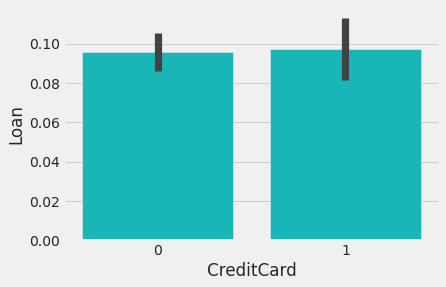

In [ ]:
sns.barplot('CreditCard', 'Loan', data=df, color="darkturquoise")
plt.show()

## Modeling

In [12]:
## defining function for assesing accuracy of logistic model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [14]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Loan', 'Security', 'CD', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop(['Loan'], axis=1)
y = data['Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
               'Mortgage', 'Security', 'CD', 'Online', 'CreditCard'] 
X = X_train
y = y_train
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['CCAvg', 'Education', 'Security', 'CD', 'CreditCard']


Optimal number of features: 11
Selected features: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Security', 'CD', 'Online', 'CreditCard']


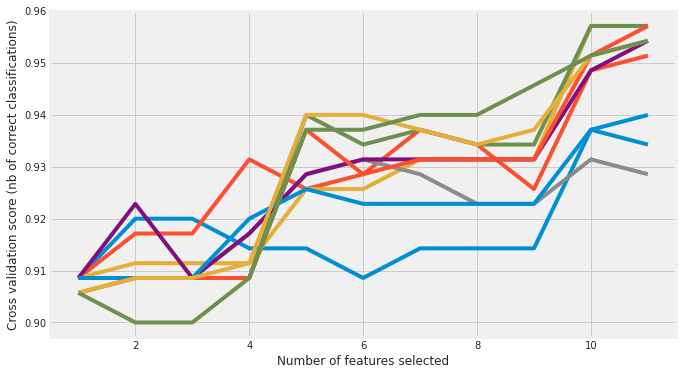

In [16]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

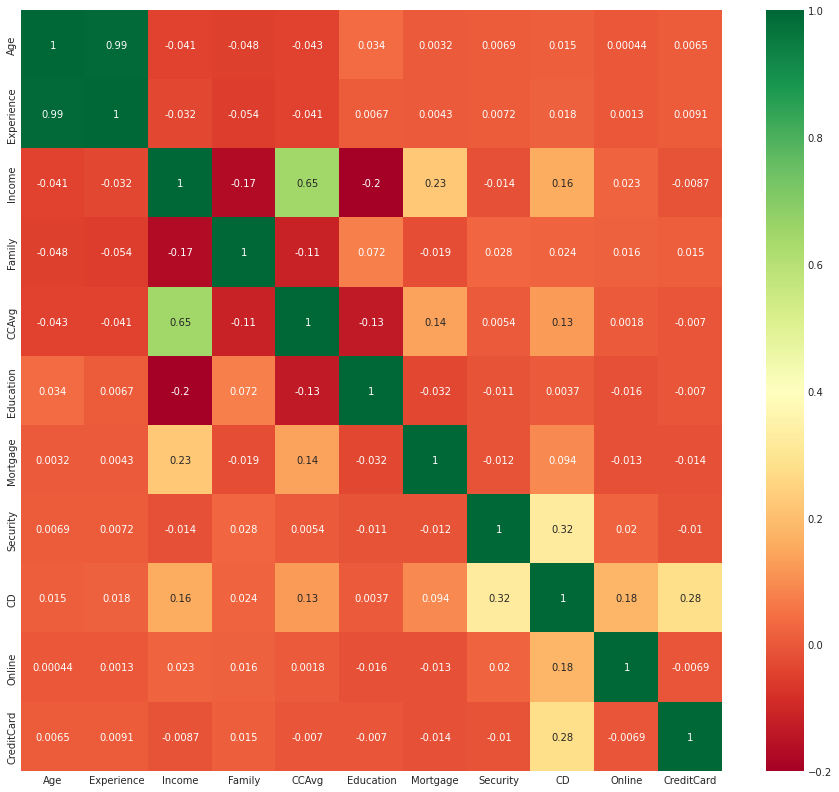

In [19]:
Selected_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
                     'Mortgage', 'Security', 'CD', 'Online', 'CreditCard']

X = X_train[Selected_features]

plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
# from sklearn.compose import make_column_transformer

# #cat_columns = ['']
# num_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
#                'Mortgage', 'Security', 'CD', 'Online', 'CreditCard']

# ct = make_column_transformer(
#     (MinMaxScaler(), num_columns),
#     (StandardScaler(), num_columns),
#     remainder='passthrough'
# )

# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

TypeError: ignored

In [20]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.959265    0.808511  0.949143     0.883888      0.945352
recall        0.985836    0.588235  0.949143     0.787035      0.949143
f1-score      0.972369    0.681004  0.949143     0.826686      0.945480
support    3177.000000  323.000000  0.949143  3500.000000   3500.000000
_______________________________________________
Confusion Matrix: 
 [[3132   45]
 [ 133  190]]

Test Result:
Accuracy Score: 94.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.956020    0.849558     0.948     0.902789      0.944877
recall        0.987342    0.611465     0.948     0.799403      0.948000
f1-score      0.971429    0.711111     0.948     0.841270      0.944182
support    1343.000000  157.000000     0.

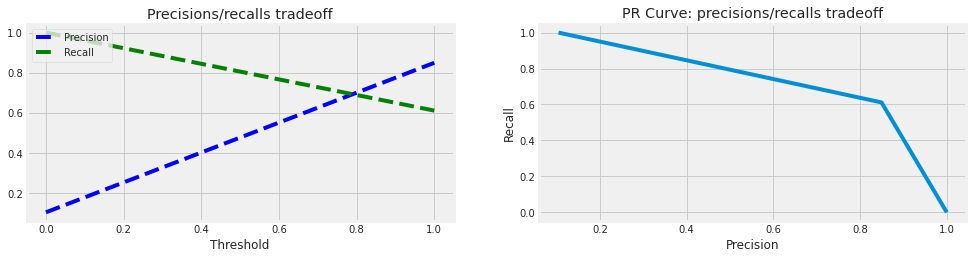

In [21]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

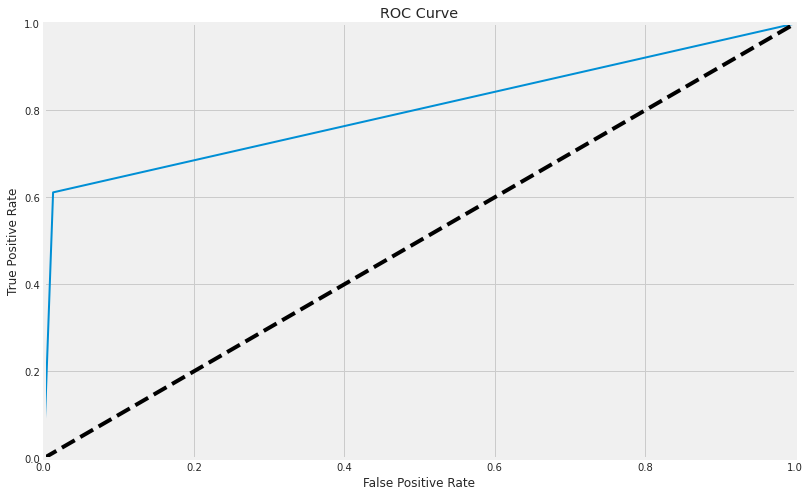

In [23]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.7994033701523824

Train/Test split results:
LogisticRegression accuracy is 0.943
LogisticRegression log_loss is 0.146
LogisticRegression auc is 0.946


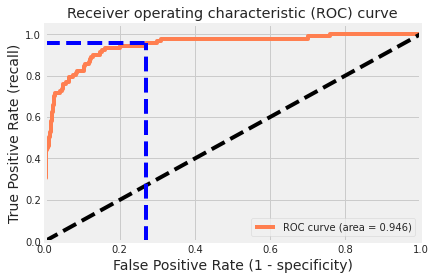

Using a threshold of 0.022 guarantees a sensitivity of 0.956 and a specificity of 0.730, i.e. a false positive rate of 26.95%.


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = data[Selected_features]
y = data['Loan']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')

print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [25]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.947
LogisticRegression average log_loss is 0.140
LogisticRegression average auc is 0.952


In [26]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.947 (+/-0.007)
LogisticRegression average log_loss: 0.140 (+/-0.013)
LogisticRegression average auc: 0.952 (+/-0.013)


In [28]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
        'Mortgage', 'Security', 'CD', 'Online', 'CreditCard']

X = X_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X_train[cols], y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.947 (+/-0.009)
LogisticRegression average log_loss: 0.138 (+/-0.030)
LogisticRegression average auc: 0.953 (+/-0.026)


best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=5.20001))])
best params: {'clf__C': 5.20001}
best score: 0.94935


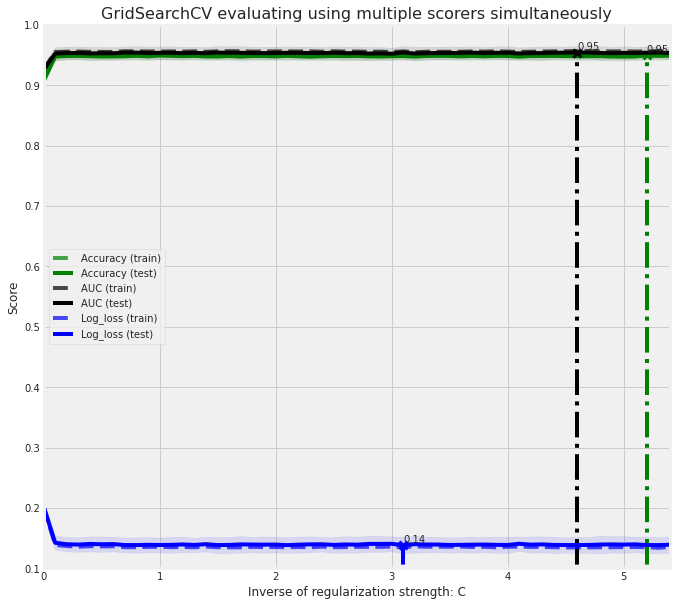

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.1, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()